<a href="https://colab.research.google.com/github/Benjamin5555/Quantum-Computing-Project/blob/master/General%20usage%20and%20Grover's%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
%cd ~
!git clone https://github.com/Benjamin5555/Quantum-Computing-Project.git
%cd Quantum-Computing-Project
!python3 setup.py install

import sys
sys.path.append("/root/Quantum-Computing-Project/circuit_model_library")


In [0]:
from circuit_model_library import circuit_model, matrices
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot  as plt

# Defining gates that will be required for component parts

We must define a collection of gates and linked characters used to define them in a circuit string representation

In [0]:
    #Hadamard Gate
    H = circuit_model.Gate(2**(-1/2) * np.array([[1,  1],\
                                                 [1, -1]]),"H")  
    
    #Pauli X Gate                                               
    X = circuit_model.Gate([[0, 1],\
                            [1, 0]],"X")                        
    
    #Identity Gate                                      
    I = circuit_model.Gate([[1, 0],\
                            [0, 1]],"I")
    
        
    #Pauli Z
    z = circuit_model.Gate(([[1,  0],\
                             [0, -1]]))
    
    
    c = circuit_model.Gate([[1,0],\
                            [0,1]],"c")

    gates_dictionary ={"I":I,\
                       "H":H,\
                       "X":X,\
                       "z":z,\
                       "c":c}

We shall code Grovers algorithm starting with 3 qubits and the grovers circuit given in fig. \ref{Grover1}

We start by instansiating a register for a 3 qubit system starting in the $\ket{000}$ state representing the matrix $$\ket{000} =  \begin{pmatrix}
 1 \\0\\ 0\\ 0 \\ 0\\0\\0\\0\\
\end{pmatrix}$$

In [0]:
reg_3_qubit = circuit_model.QuantumRegister([0],(8,1))


We by hand convert the circuit into a list of strings with the most significant qubit being the topmost qubit and the first string in the list of strings:



In [0]:
grov_3_qubit_string = ["HcIHXcXH",\
                       "HIcHXcXH",\
                       "HzzHXzXH"]

We instansiate our circuit object using this representation and the dictionary of linkings between gate symbol and gate object 

In [0]:
Grov_3_bit = circuit_model.QuantumCircuit(grov_3_qubit_string,gates_dictionary)

We next apply the circuit to our register we generated earlier and plot the output values vs their probabilities

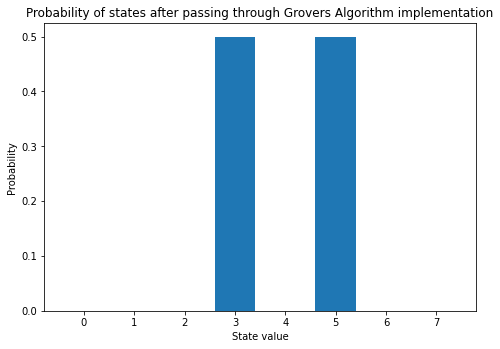

In [7]:
out_reg = Grov_3_bit.apply(reg_3_qubit)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(out_reg.measure()[0],out_reg.measure()[1])
ax.set_ylabel('Probability')
ax.set_xlabel('State value')
ax.set_title('Probability of states after passing through Grovers Algorithm implementation')
plt.show()

**Using More qubits**
A more complex example involves the usage of Grovers Algorithm for higher qubit states, we define a function that will create a Grovers function for an arbitary circuit as shown in figure https://qcsimulator.github.io/?example=Grover%27s%20Algorithm  (Double click on a gate at the top to view what they are) but with different states picked out


In [0]:
def grovers_algorithm_from_strings(grov_string):
    """Example of how the produced solution could be used to generate a function
    for Grovers from strings
    """
    reg = circuit_model.QuantumRegister([1],(2**len(grov_string),1))
    Grov_circuit = circuit_model.QuantumCircuit(grov_string,gates_dictionary)
    out_reg = Grov_circuit.apply(reg)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(out_reg.measure()[0],out_reg.measure()[1])

    ax.set_ylabel('Probability')
    ax.set_xlabel('State value')
    ax.set_title('Probability of states after passing through Grovers Algorithm implementation')
    plt.show()

This works for a range of qubits 
5 qubits with 1 ancilla (work) qubit with the 11101(0) state picked out 

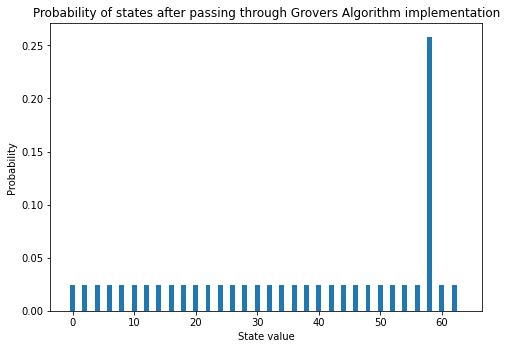

In [9]:
grovers_algorithm_from_strings([\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HXcXHXcXHII",\
                        "HIcIHXzXHII",\
                        "HIXIIIIIIHX"])

This works for a range of qubits 
6 qubits with 1 ancilla (work) qubit again marking the 1111110 state.

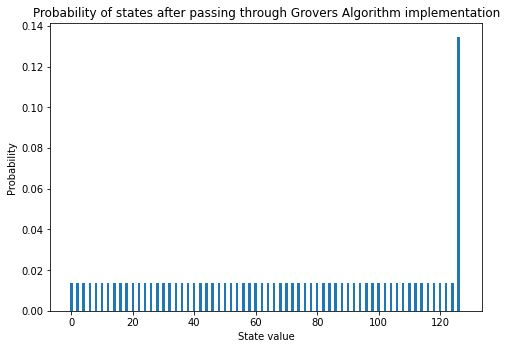

In [10]:
grovers_algorithm_from_strings([\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXzXHII",\
                        "HIXIIIIIIHX"])

This works for a range of qubits 
7 qubits with 1 ancilla (work) qubit 

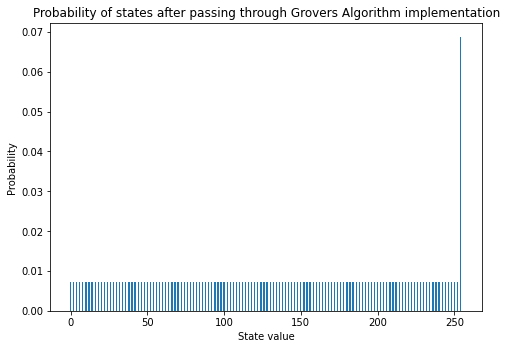

In [11]:
grovers_algorithm_from_strings([\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXzXHII",\
                        "HIXIIIIIIHX"])

This works for a range of qubits 8 qubits with 1 ancilla (work) qubit, we expect this to produce the 111111110 state  

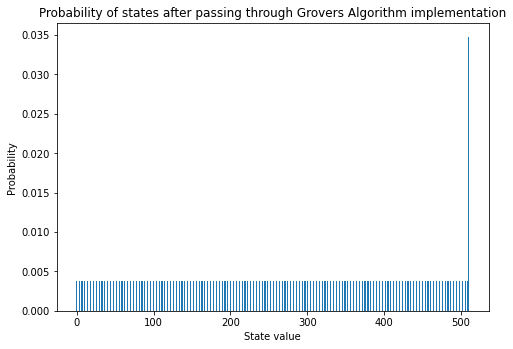

In [12]:
grovers_algorithm_from_strings([\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXzXHII",\
                        "HIXIIIIIIHX"])

For a total 10 qubits we have an issue that the state being highlighted no longer has greatest probability, this may be due to an issue with sizes of matrices at this point e.g. we have a 2048* 2048 matrix representing the circuit which for a dense matrice will potentially contain of the order 1 million elements.

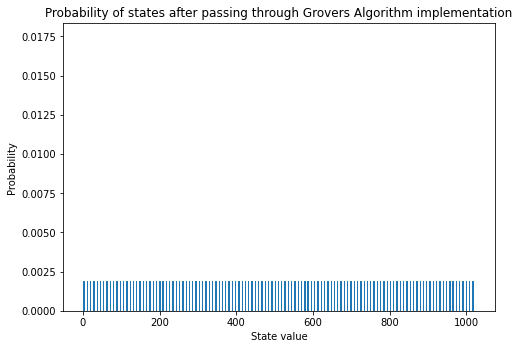

In [13]:
grovers_algorithm_from_strings([\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXcXHII",\
                        "HIcIHXzXHII",\
                        "HIXIIIIIIHX"])